In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error,r2_score

In [4]:
data=pd.read_csv("encoded_car_data (1).csv")
data.head()
data=pd.get_dummies(data,drop_first=True)

In [5]:
X=data.drop('price',axis=1)
y=data['price']

In [6]:
scaler=StandardScaler()
X=scaler.fit_transform(X)
y=scaler.fit_transform(y.values.reshape(-1,1))

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
models={
    "Ridge":Ridge(alpha=1.0),
    "Lasso":Lasso(alpha=1.0),
    "ElectricNet":ElasticNet(alpha=1.0,l1_ratio=0.5)
}

In [9]:
results={}

In [10]:
for name,model in models.items():
    pipeline=Pipeline([
        ('poly',PolynomialFeatures(degree=2)),
        ('regressor',model)
    ])

In [11]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('poly', PolynomialFeatures()), ('regressor', ElasticNet())])

In [12]:
predictions=pipeline.predict(X_test)

In [14]:
mse=mean_squared_error(y_test,predictions)
r2=r2_score(y_test,predictions)

In [15]:
results[name]={'MSE':mse,'R2 Score':r2}

In [24]:
print('Name: Varoodhini.M')
print('Reg. No:212225220118')
for model_name,metrics in results.items():
    print(f"{model_name}-Mean Squared Error: {metrics['MSE']:.2f},R2 Score: {metrics['R2 Score']:.2f}")

Name: Varoodhini.M
Reg. No:212225220118
ElectricNet-Mean Squared Error: 0.63,R2 Score: 0.49


In [18]:
results_df=pd.DataFrame(results).T
results_df.reset_index(inplace=True)
results_df.rename(columns={'index':'Model'},inplace=True)

In [19]:
plt.figure(figsize=(12,5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

(array([0]), [Text(0, 0, 'ElectricNet')])

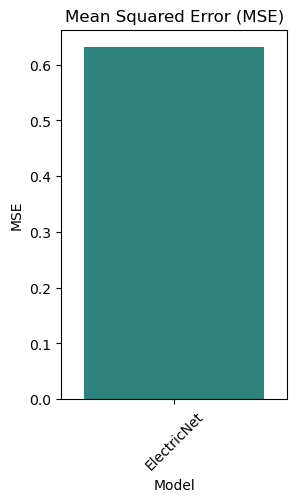

In [21]:
plt.subplot(1,2,1)
sns.barplot(x='Model',y='MSE',data=results_df,palette='viridis')
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')
plt.xticks(rotation=45)

(array([0]), [Text(0, 0, 'ElectricNet')])

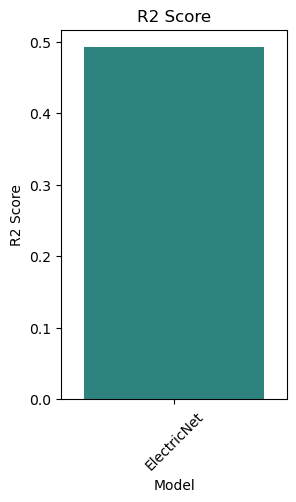

In [22]:
plt.subplot(1,2,2)
sns.barplot(x='Model',y='R2 Score',data=results_df,palette='viridis')
plt.title('R2 Score')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)

In [23]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>